# **Capstone Project: Data Driven suggestions for HR**

## Resumen

Este es el proyecto final para la certificación de Google Advanced Data Analytics brindado por Coursera, la siguiente data simula ser una empresa que busca tomar acciones para mejorar la satisfacción de los empleados. La data contiene distintas columnas con información recopilada a los empleados y se solicita realizar un análisis exploratorio y luego construir un modelo que pueda predecir si un empleado abandonará o no la empresa.

### HR Dataset

El dataset contiene 15000  filas y 10 coumnas divididas de la siguiente manera.

**Note:** Para mas información sobre el datast se puede descargar desde el siguiente link [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|nivel de satisfacción laboral [0&ndash;1]|
last_evaluation|Puntuación de la última evaluación de rendimiento del empleado [0&ndash;1]|
number_project|Número de proyectos a los que el empleado colabora.|
average_monthly_hours|Número promedio de horas que el empleado trabaja al mes.|
time_spend_company|Cuantos años el empleado está o estuvo en la compañia (años)
Work_accident|Si el empleado ha tenido o no un accidente en el trabajo.
left|Si el empleado ha dejado o no la compañia.
promotion_last_5years|Si el empleado ha sido promovido de puesto duante los últimos 5 años.
Department|Departamento al que pertenece el empleado.
salary|Salario del empleado (U.S. dollars)

## 1. Importando librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
print("las librerías hansido instaladas")

sns.set_style("darkgrid")
# sns.set_palette("RdBu")

las librerías hansido instaladas


In [2]:
df=pd.read_csv("HR_capstone_dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Limpieza y EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.shape

(14999, 10)

In [5]:
#Renombrando columnas
df.rename(columns={"Work_accident":"work_accident",
                   "average_montly_hours":"average_monthly_hours",
                   "time_spend_company":"tenure",
                   "Department":"department"}, inplace=True)

#### 2.1 Verificando valores nulos

In [6]:
#Verificando valores nulos
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

La data no presenta valores nulos en ninguna de sus variables.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_monthly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
tenure,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


- El promedio del nivel de satisfacción de los empleados es de 0.61, un nivel moderado.
- Las evaluaciones a los empleados también estan por encima del promedio inferior, 0.71.
- Por otra parte vemos que el promedio de horas mensuales trabajadas es de 201 h/m. y el máximo es de 310. Debemos tomar en cuenta este dato.
- La permanencia de los empleados en la compañia en promedio es de 3.5 años cuando el máximo es de 10 años.
- La promoción de los últimos 5 años indica que aproximadamente el 2.1% de los empleados ha sido promovido de puesto durante este tiempo.

#### 2.2 Verificando valores duplicados

In [8]:
#Verificando valores duplicados
df.duplicated().sum()

3008

El dataset muestra 3008 filas duplicadas, eso es el 20% del df. Indagaremos más.

In [9]:
df[(df["department"]=="sales") & (df["salary"]=="medium") & (df["satisfaction_level"]==0.37)][df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
12178,0.37,0.51,2,127,3,0,1,0,sales,medium
12535,0.37,0.56,2,156,3,0,1,0,sales,medium
14389,0.37,0.51,2,127,3,0,1,0,sales,medium
14746,0.37,0.56,2,156,3,0,1,0,sales,medium


Ya que el dataset no cuenta con un Nro. único identificador, no podemos asumir de que cada fila es independiente y que no es un arror de duplicidad, por ende procederemos a eliminar las filas duplicadas.

In [10]:
#Elimincamos las filas duplicadas 
df=df.drop_duplicates()
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 3.Visualización de Datos

In [11]:
#Create functions to visualize the data
def countplot(column_name, rotation=0):
    """
    column_name must be categorical
    """
    plt.figure(figsize=(15,6))
    sns.countplot(data=df, x=column_name)
    plt.title(f"{column_name}")
    plt.xticks(rotation=rotation)
    plt.show()

def pieplot(column_name):
    """
    column_name must be categorical with 2 or 3 cat
    """
    plt.pie(df[column_name].value_counts(), labels=df[column_name].value_counts().index, autopct="%1.2f%%", shadow=True)
    plt.show()

def boxplot(column_name, bins=0):
    """
    column_name must be numerical
    """
    fig,ax=plt.subplots(1,2, figsize=(15,6))
    sns.boxplot(data=df, x=column_name, ax=ax[0])
    sns.histplot(data=df, x=column_name, ax=ax[1], bins=bins)
    ax[0].set_ylabel(column_name)
    ax[0].set_xlabel("FRQ")
    ax[1].set_ylabel(column_name)
    plt.show()

### 3.1 Análisis Univariado

In [12]:
df.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'tenure',
 'work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

#### `satisfaction_level`

In [13]:
df["satisfaction_level"].nunique()

92

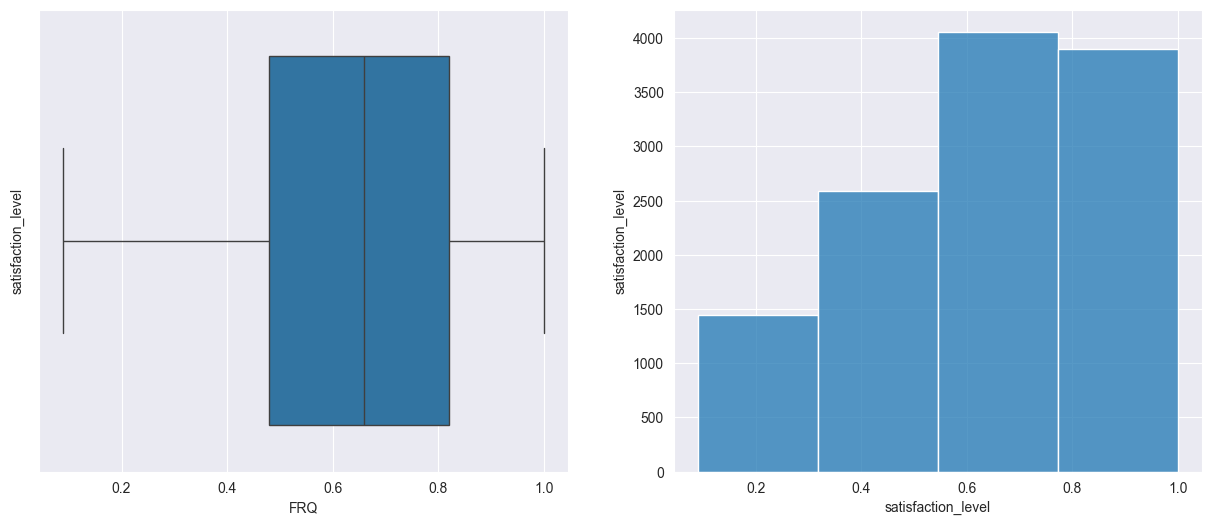

In [14]:
boxplot("satisfaction_level", 4)

- El promedio del nivel de satisfacción es de 0.65.

#### `last_evaluation`

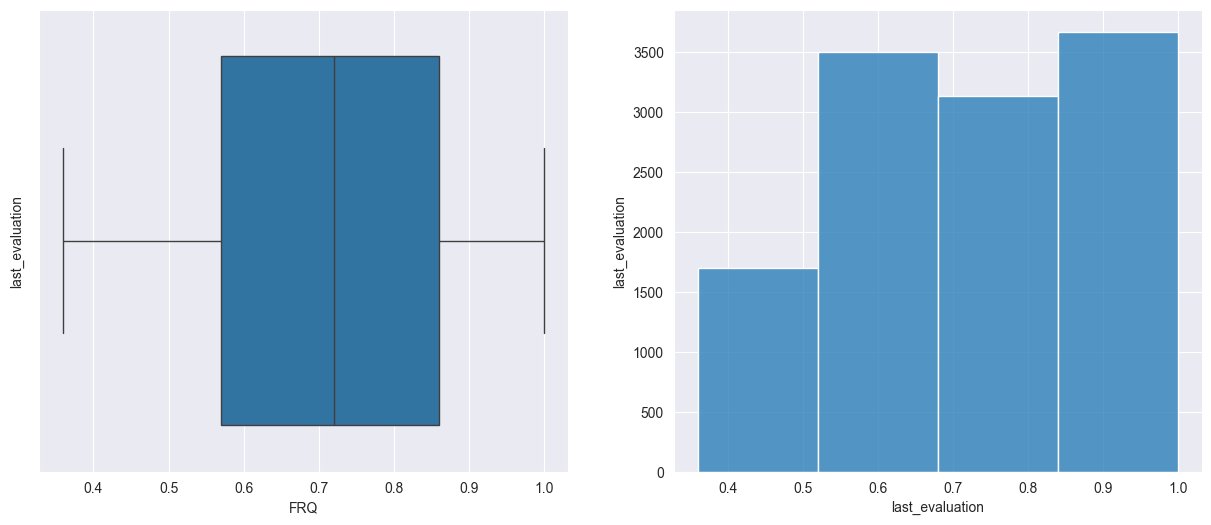

In [15]:
boxplot("last_evaluation", 4)

- En promedio la ultima evaluación ha estado por encima de 0.7.

#### `number_project`

In [16]:
df["number_project"].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

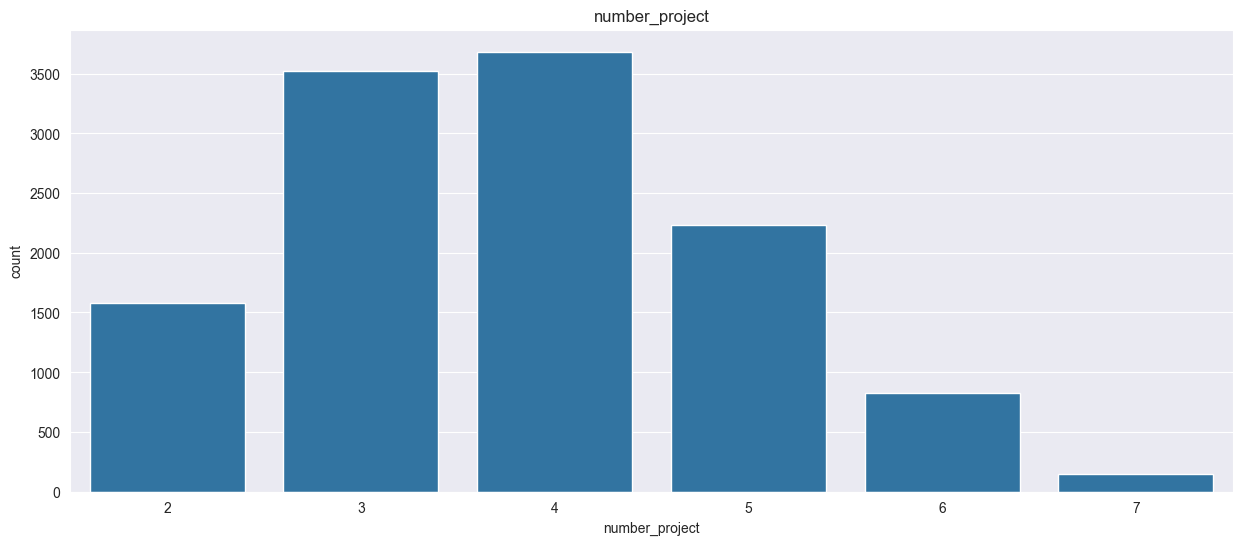

In [17]:
countplot("number_project")

- La mayoría de empleados están trabajando en 4 proyectos al mismo tiempo.

#### `average_monthly_hours`

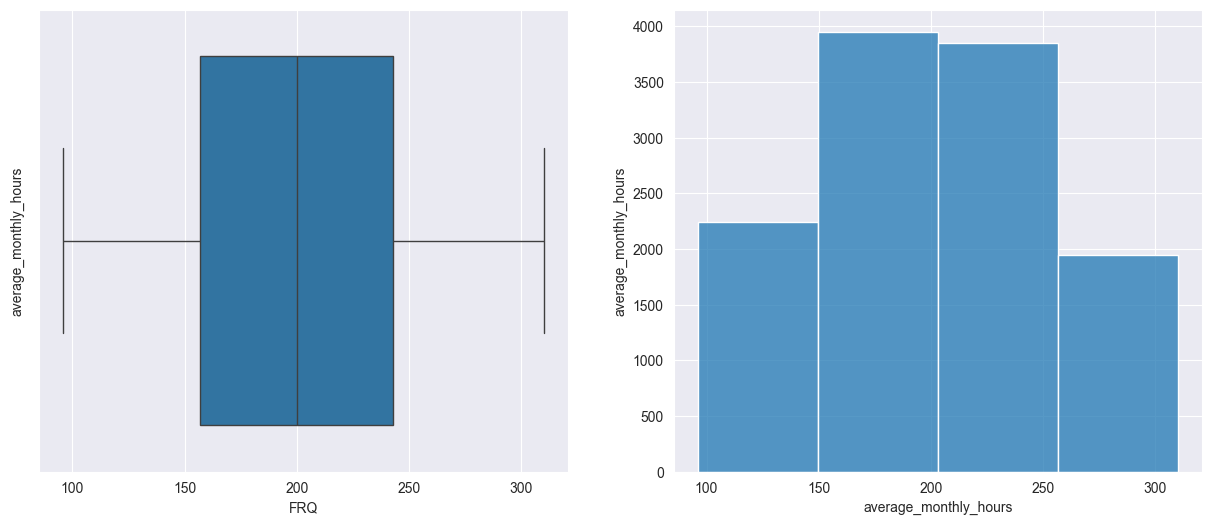

In [18]:
boxplot("average_monthly_hours", 4)

- En promedio los empleados trabajan 200 horas al mes, con picos superiores a 300 horas al mes.

#### `tenure`

In [19]:
df["tenure"].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

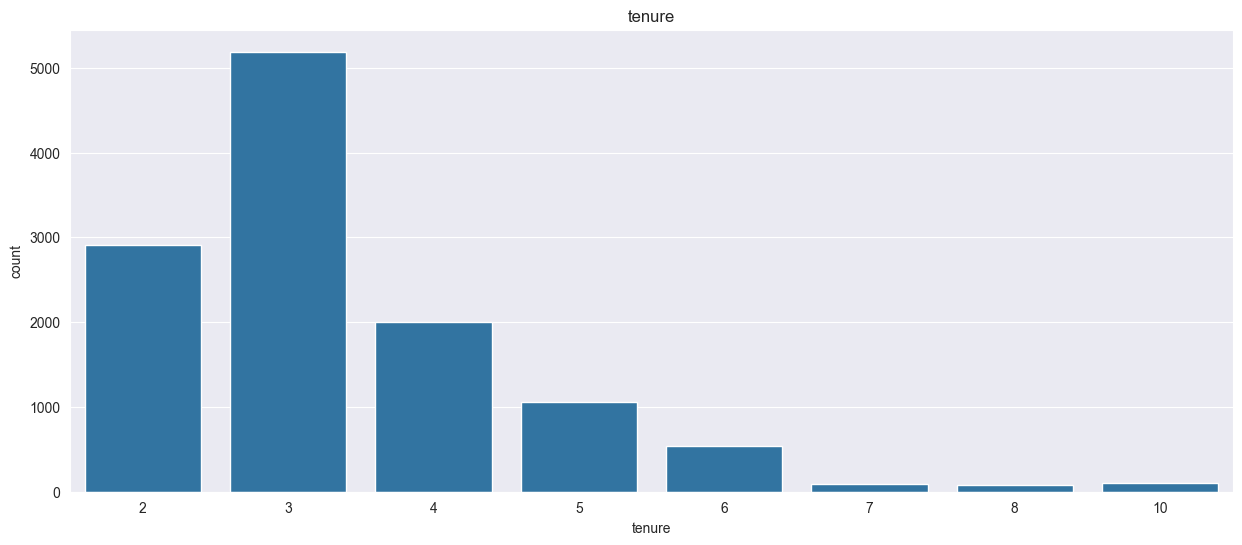

In [20]:
countplot("tenure")

- La mayor cantidad de empleados tienen o han tenido trabajando en la empresa 3 años.

#### `left`

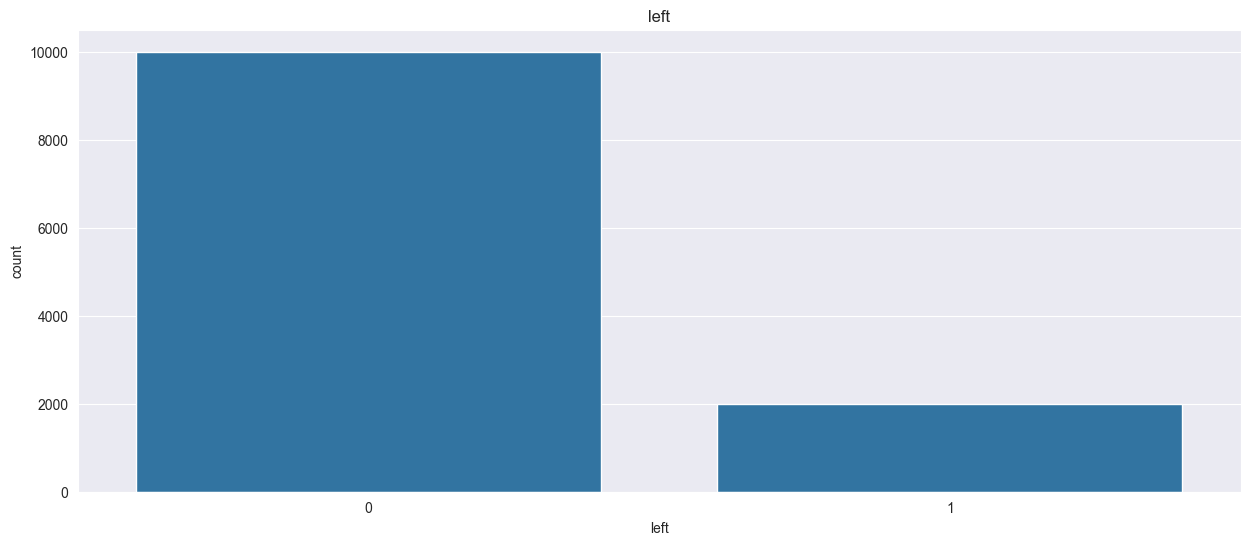

In [21]:
countplot("left")

#### `department`

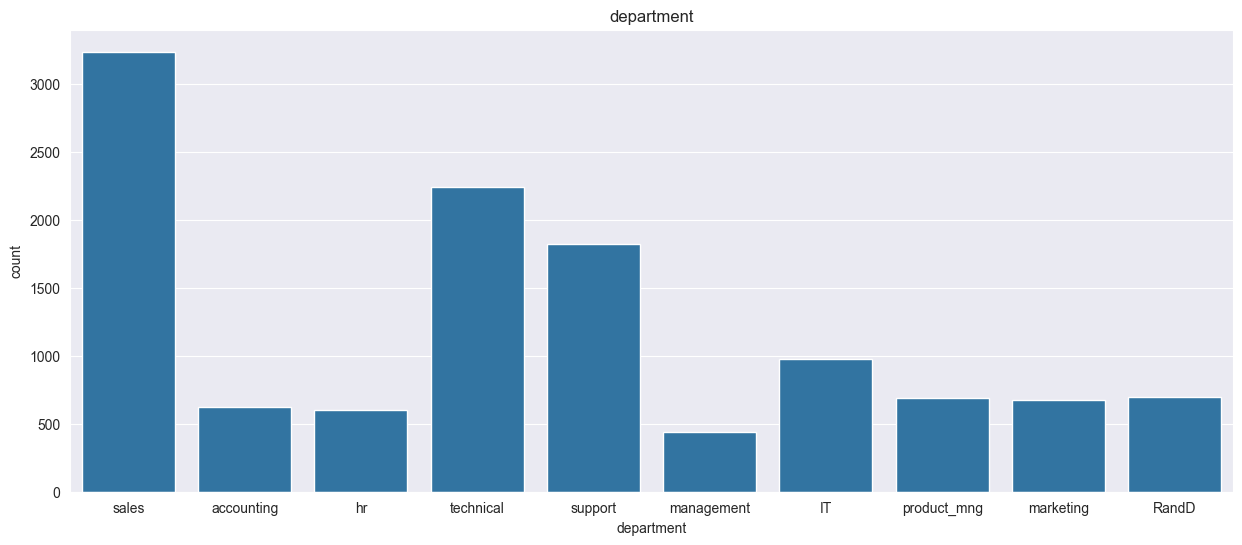

In [22]:
countplot("department")

### 3.2 Análisis Bivariado

In [23]:
#Definimos funciones para las visualizaciones
def count_plot(column_name, hue=None, rotation=0):
    plt.figure(figsize=(15,6))
    sns.countplot(data=df, x=column_name, hue=hue, dodge=True)
    plt.title(f"{column_name}")
    plt.show()

def scatter(column_name_x, column_name_y, hue=None):
    plt.figure(figsize=(15,4))
    sns.scatterplot(data=df, x=column_name_x, y=column_name_y, hue=hue, alpha=.4)
    plt.legend(loc="best")
    plt.title(f"{hue} by {column_name_x} and {column_name_y}")
    plt.show()

def boxplot(column_name_x, column_name_y, hue=None):
    plt.figure(figsize=(15,6))
    sns.boxplot(data=df, x=column_name_x, y=column_name_y, hue=hue)
    plt.legend(loc="best")
    plt.title(f"Boxplot entre {column_name_x}, {column_name_y} y {hue}")
    plt.show()

#### `department` by `left`

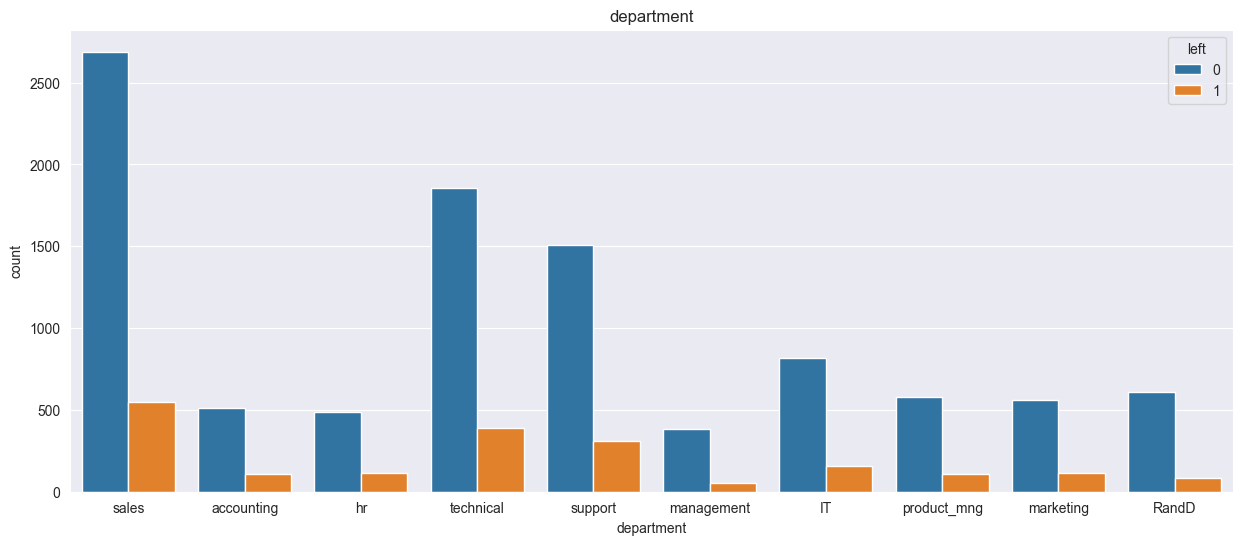

In [24]:
count_plot("department", "left")

- Podemos apreciar que el departamento que más rotación ha tenido es el departamento de ventas. 

#### Relationship of `tenure`& `satisfaction_level` by `left`

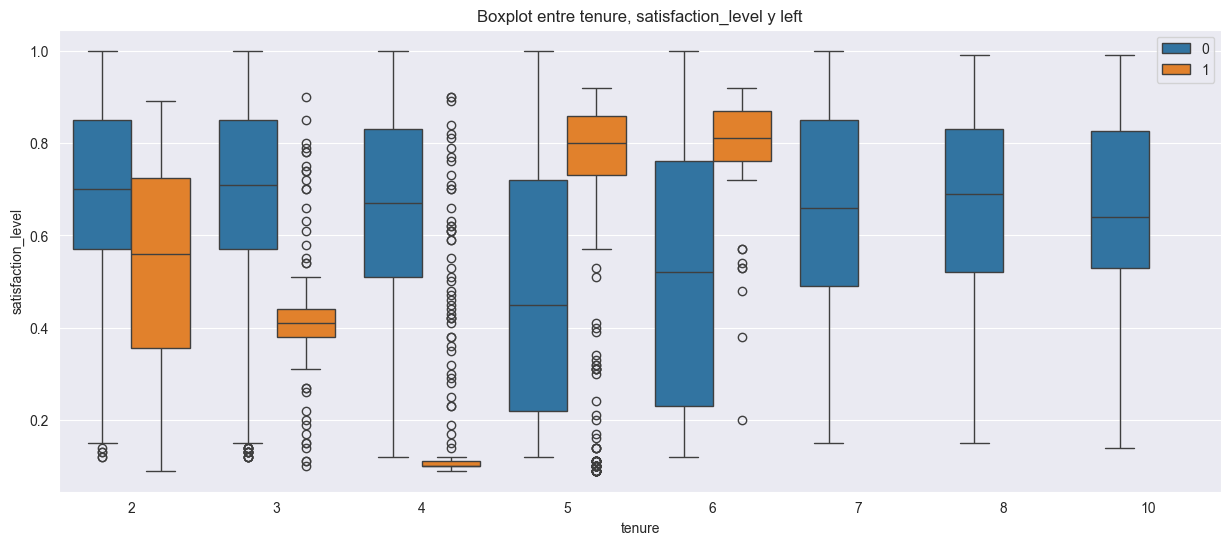

In [25]:
boxplot("tenure", "satisfaction_level", "left")

- Los empleados con 4 años de permanencia que abandonaron la empresa tienen curiosamente un nivel de satisfacción muy bajo en comparación con el resto, sería bueno revisar si cambio alguna política para esos empleados.
- Por otra parte el nivel de satisfacción de los empleados mas antiguos es muy similar al de los nuevos empleados.

#### `left` by`average_monthly_hours` and `department`

Hemos calculado que en un escenario ideal, donde se trabaja 40 horas por semana durante 50 semanas al año (teniendo en cuenta 2 semanas de vacaciones), la cantidad promedio de horas por mes trabajadas sería de 166. Y como pudimos observar en los datos, el promedio es de 200 h/m con un maximo de 310 h/m. 

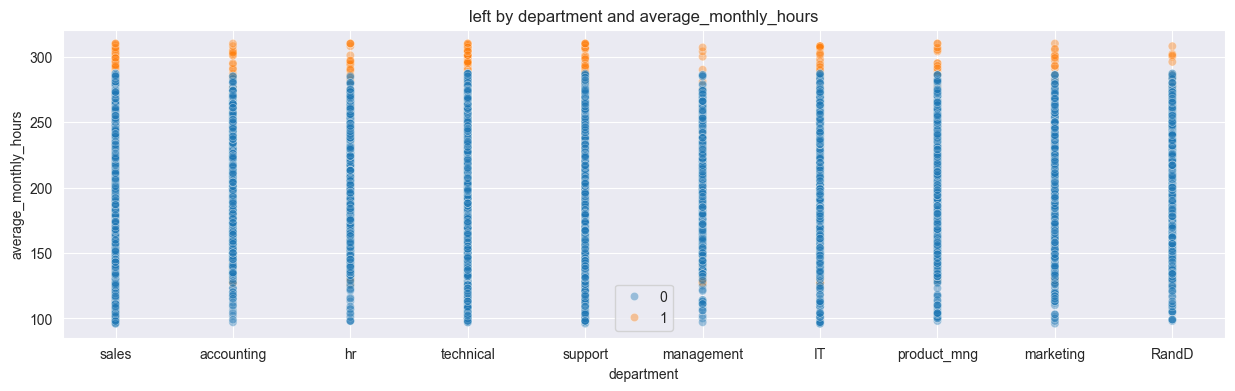

In [26]:
scatter("department", "average_monthly_hours", "left")

- Podemos observar que todos los departamentos superan muy por encima el promedio las horas trabajadas al mes.
- Los empleados que ya no se encuentran en la empresa en promedio trabajaban 300 h/m.

#### `left` by`average_monthly_hours`and `satisfaction_level`

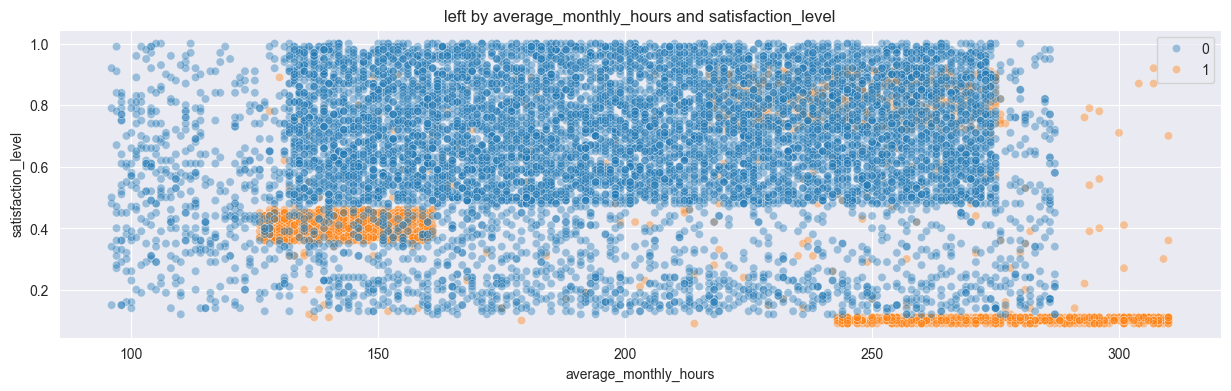

In [27]:
scatter("average_monthly_hours", "satisfaction_level", "left")

- El grupo de personas que trabajaban por encima de 230 h/m y renunciaron tenian un satisfacción laboral por debajo del 20%.

#### `left` by `average_monthly_hours` and `number_project`

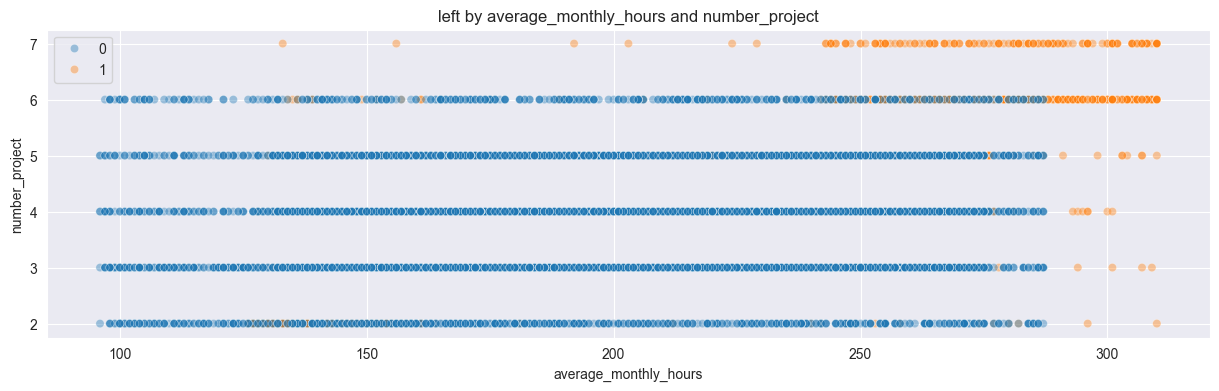

In [28]:
scatter("average_monthly_hours", "number_project", "left")

- Todos los empleados con 7 proyectos y promedio mensual de horas de trabajo por encima de 230 h/m han renunciado a la empresa.
- Este patrón casi se repite con los empleados que trabajan en 6 proyectos, la concentración de renuncia esta en aquellos que trabajan en más de 280 h/m. 

#### `left` by `average_monthly_hours` and `last_evaluation`

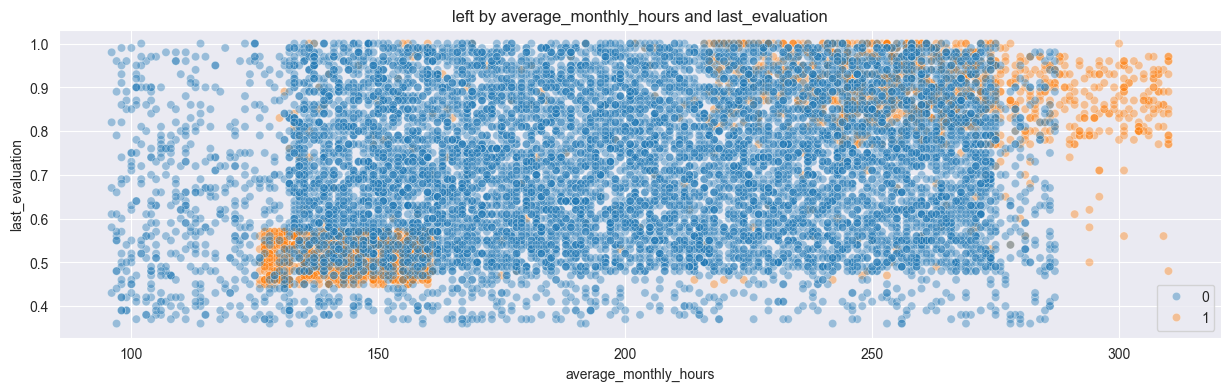

In [29]:
scatter("average_monthly_hours", "last_evaluation", "left")

- La rotación de personal se divide en 2 grupos, por sobrecarga de trabajo y tenían una evaluación muy alta, y los que trabajaban por debajo del promedio mensual y tenían una evaluación baja.
- Se puede ver una correlación entre horas de trabajo y la evaluación al personal.
- Se puede observar que trabajar largas horas al mes tampoco asegura una alta evaluación.

#### `left` by `average_monthly_hours` and `promotion_last_5years`

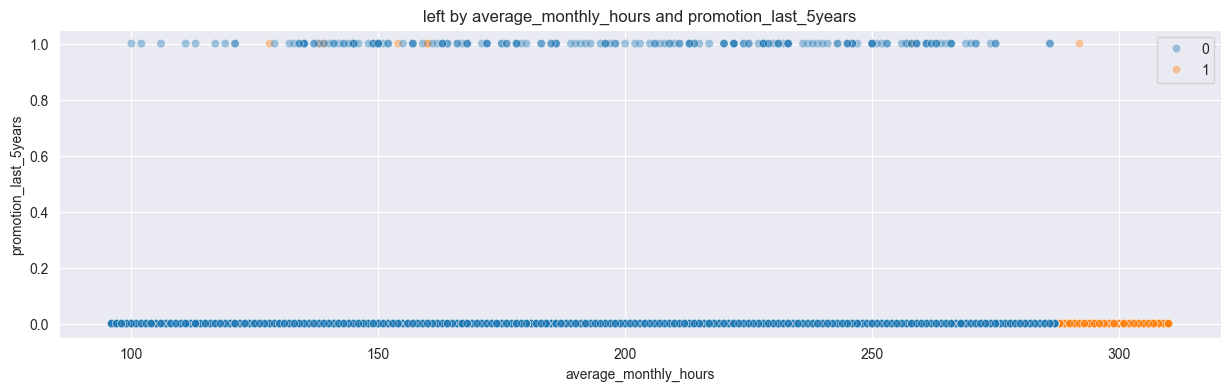

In [30]:
scatter("average_monthly_hours", "promotion_last_5years", "left")

- En los últimos 5 años, muy pocos empleados han sido promovidos de puesto.
- Todas las personas que no han sido promovidas y han renunciado o han sido despedidas trabajaban en promedio mensual largas horas.

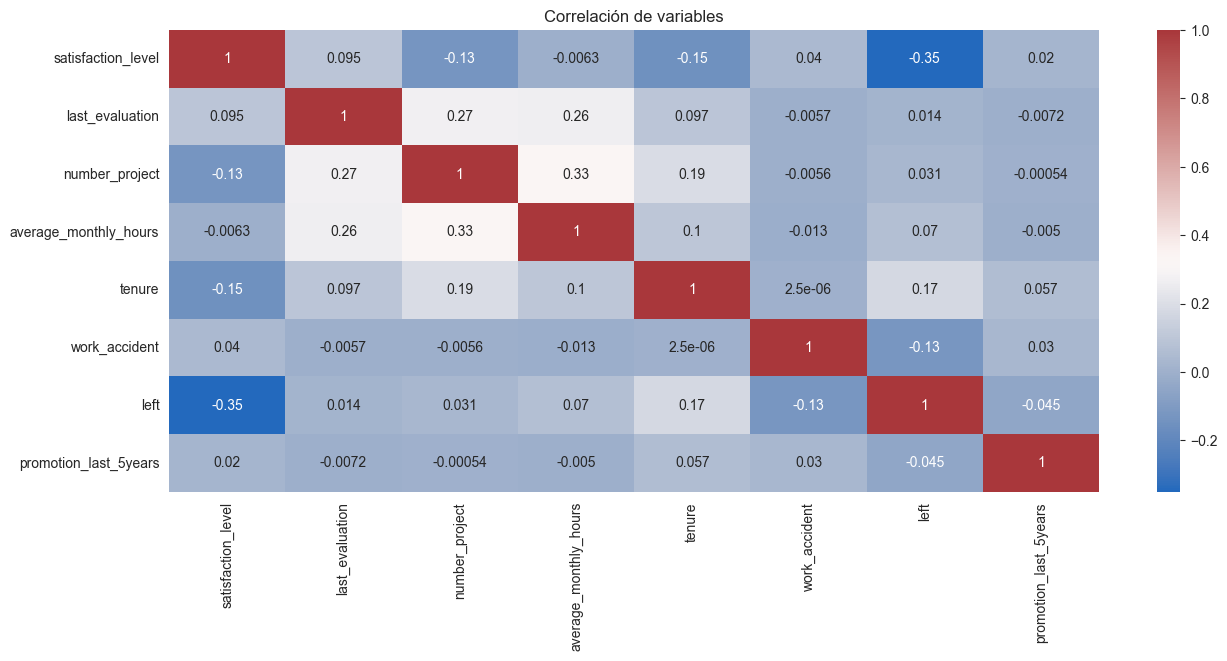

In [31]:
#Heatmap correlation
var_num=df.describe().columns.tolist()
plt.figure(figsize=(15,6))
sns.heatmap(data=df[var_num].corr(), annot=True, cmap="vlag")
plt.title("Correlación de variables")
plt.show()

- La correlación de variables confirma que `number_project`, `last_evaluation` y `average_monthly_hours`, todos tienen una correlación positiva moderada.
- Por otro lado `satisfaction_level` y `left`muestra una correlación negativa, quiere decir que mientras más baje el nivel de satisfacion aumentarán las renuncias.

### 3.2 Insights

- En resumen, se pudo observar que la mayoría de empleados que abandonan la empresa es por una mala gestión ligada a jornadas laborales largas y estar trabajando en varios proyectos a la vez. A esto sumar el hecho de tampoco recibir promociones en puestos de trabajo y sentirse sobrecargados.
- También pudimos observar que los empleados que llevan más de 6 años en la empresa, tienden a quedarse y no renunciar.

## 4. Feature Engineering

Como se pudo observar, uno de los principales motivos de renuncia está relacionado con la carga laboral y las largas horas de trabajo. Por lo tanto, considerando que el promedio mensual de horas laborales en un escenario ideal es de 166.67 horas mensuales, podemos establecer que trabajar más de 175 horas al mes se considera una sobrecarga de trabajo.

Para ello crearemos una columna binaria nueva llamada `overworked`.

In [32]:
#Creando columna
df["overworked"]=df["average_monthly_hours"].apply(lambda x: 1 if x > 175 else 0)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


## 5. Codificando Variables

In [33]:
#Limpiando outliers
Q1 = df["tenure"].quantile(0.25)
Q3 = df["tenure"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df["tenure"]=df["tenure"].apply(lambda x: lower_limit if x < lower_limit else x)
df["tenure"]=df["tenure"].apply(lambda x: upper_limit if x > upper_limit else x)

Variables to drop:
- `average_monthly_hours`

In [34]:
df.drop(columns=["average_monthly_hours"], inplace=True)

In [35]:
#Codificando variable Salary 0 = low, 1 = medium, 2=high
df["salary"]=df["salary"].apply(lambda x: 0 if x == "low" else (1 if x == "medium" else (2 if x == "high" else x)))
df.head()

,satisfaction_level,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.38,0.53,2,3.0,0,1,0,sales,0,0
1,0.80,0.86,5,5.5,0,1,0,sales,1,1
2,0.11,0.88,7,4.0,0,1,0,sales,1,1
3,0.72,0.87,5,5.0,0,1,0,sales,0,1
4,0.37,0.52,2,3.0,0,1,0,sales,0,0


In [36]:
#dummies for departmen column
df=pd.get_dummies(data=df, columns=["department"], dtype=int)

In [37]:
#Realimos split antes de escalar las variables numéricas
y = df["left"]
X = df.drop(columns="left")

In [38]:
var_to_stand = ["satisfaction_level", "last_evaluation", "number_project", "tenure"]

In [39]:
#split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.25, random_state=0)

In [40]:
#Aplicamos escalado a las variables numéricas de X_train y X_test
scaler=StandardScaler()
X_train[var_to_stand] = scaler.fit_transform(X_train[var_to_stand])
X_test[var_to_stand] = scaler.transform(X_test[var_to_stand])

## 6. Modelado

- El enfoque final del modelado es predecir si el empleado dejará la empresa o no, para eso contamos con una variable "left" que es binaria 1=si, 0=no.
- Debido a que la variable a predecir es categórica vamos a construiur un modelo de Regresión Logística y modelo de machine Learning basado en árboles de decisión.

### 6.1 DecissionTree

Para los siguientes modelos usaremos la validación cruzada con GridSearchCV.

In [41]:
#Iniciamos el modelo
dt = DecisionTreeClassifier(random_state=0)

#Definimos los hyperparametros
cv_params = {"max_depth":[2,4,6,8,10,20,30,40,None],
            "min_samples_leaf":[2,5,10,20,50],
            "min_samples_split":[2,4,6,8,10]}

scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

dt_cv = GridSearchCV(dt, cv_params, scoring=scoring, cv=5, refit="roc_auc")

In [42]:
%%time
#Entrenamos elmodelo
dt_cv.fit(X_train, y_train)

CPU times: total: 18.1 s
Wall time: 22.4 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 20, 30, 40, None],
                         'min_samples_leaf': [2, 5, 10, 20, 50],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [43]:
#Los mejores parámetros
dt_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 2}

In [44]:
#el mejor AUC
dt_cv.best_score_

0.969347709366793

Es un AUC fuerte, lo cual indica que este modelo puede predecir muy bien a los empleados que se irán

In [45]:
#Construyendo una función para recoger los mejores valores y poderlos comparar despues

def best_result(nombre_modelo, modelo_object):
               
    best=pd.DataFrame(modelo_object.cv_results_) # llevamos todos los resultados a df
    
    best=best.iloc[best["mean_test_roc_auc"].idxmax(), :] #Extraemos solo el maximo valor
    
    #Extraemos auc, accuracy, precision, recall y f1 y lo llevamos a un dataframe
    auc = best["mean_test_roc_auc"]
    recall=best["mean_test_recall"]
    accuracy = best["mean_test_accuracy"]
    precision = best["mean_test_precision"]
    f1 = best["mean_test_f1"]
    table=pd.DataFrame({"Modelo":[nombre_modelo],
                        "Precision":[precision],
                        "Recall":[recall],
                        "f1":[f1],
                        "Accuracy":[accuracy],
                       "AUC":[auc]}
                        )
    return table    

In [46]:
results_dt = best_result("Decision Tree CV", dt_cv)
results_dt

,Modelo,Precision,Recall,f1,Accuracy,AUC
0,Decision Tree CV,0.932016,0.905564,0.918432,0.973312,0.969348


Los scores que presenta este modelo son muy fuertes y con muy buen performance, pero tengamos en cuenta que DecisionTree es sensible al overfitting por eso procederemos a volver a modelar usando RandomForest que es robusto ante el overfitting.

### 6.3 Random Forest

In [47]:
#Iniciamos el modelo

rf = RandomForestClassifier(random_state=0)

#Definimos los hyperparametros
cv_params={"max_depth":[2,3,4,5,None],
          "min_samples_leaf":[1,2,3],
          "min_samples_split":[2,3,4],
          "max_features":[1.0],
          "n_estimators":[75, 150,300,500]}

scoring=["accuracy", "f1", "precision", "recall", "roc_auc"]

rf_cv=GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit="roc_auc")

In [48]:
%%time
#Entrenamos el modelo
rf_cv.fit(X_train, y_train)

CPU times: total: 13min 3s
Wall time: 20min 2s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, None], 'max_features': [1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 150, 300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [49]:
#Los mejores parámetros
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [50]:
#el mejor AUC
rf_cv.best_score_

0.9771785414468811

In [51]:
results_rf=best_result("Random Forest CV", rf_cv)
results=pd.concat([results_rf, results_dt])

In [52]:
results

,Modelo,Precision,Recall,f1,Accuracy,AUC
0,Random Forest CV,0.940555,0.910925,0.925416,0.975648,0.977179
0,Decision Tree CV,0.932016,0.905564,0.918432,0.973312,0.969348


El score de RandomForest son mejores que las de DecisionTree por lo tanto vamos a utilizar este modelo.

### 6.4 Modelo Ganador

##### Nuestros modelos buscan el mejor AUC y en este caso vemos que RandomForest es ligeramente mejor que DecissonTree, por eso escogemos este modelo.

In [53]:
y_pred=rf_cv.best_estimator_.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

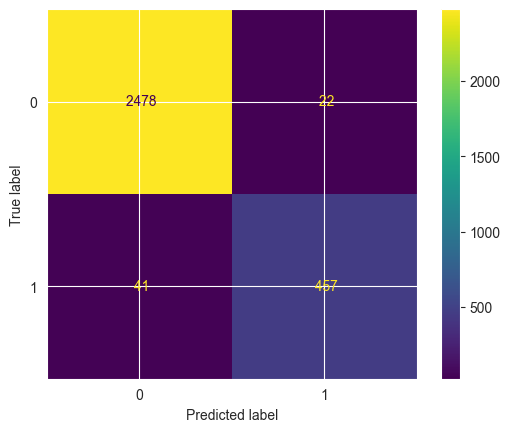

In [54]:
#Construyendo la Matriz de Confusión

cm = confusion_matrix(y_test, y_pred, labels=rf_cv.classes_)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)
cm_plot.plot(values_format=" ")
plt.show()

In [55]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"El accuracy del modelo es de {accuracy:.3f}")
print(f"La precision del modelo es de {precision:.3f}")
print(f"El recall del modelo es de {recall:.3f}")
print(f"El f1_score del modelo es de {f1:.3f}")

El accuracy del modelo es de 0.979
La precision del modelo es de 0.954
El recall del modelo es de 0.918
El f1_score del modelo es de 0.936


- **Accuracy**: El modelo tiene una precisión de 0.98. Esto significa que el 98.0% de las predicciones realizadas por el modelo son correctas en relación con todas las predicciones hechas.
  
- **Precision**: La precisión del modelo es de 0.948. Esto indica que, de todas las predicciones positivas hechas por el modelo, el 96.2% son verdaderamente positivas. En otras palabras, el modelo tiende a realizar pocas predicciones falsas positivas.

- **Recall:** El recall del modelo es del 0.91. Esto significa que el modelo es capaz de identificar correctamente el 91.8% de los casos positivos reales en el conjunto de datos.

- **F1 Score:** El valor del F1 Score es de 0.928. El F1 Score es una métrica que combina la precisión y el recall en una sola medida. En este caso, el valor del F1 Score refleja un equilibrio muy bueno entre la precisión y el recall.

El modelo es altamente efectivo para realizar predicciones precisas y para identificar la mayoría de los empleados a renunciar o los posibles empleados que serán despedidos. El valor del F1 Score también indica que el equilibrio entre la precisión y el recall es muy bueno, lo que sugiere que el modelo es adecuado para esta tarea de clasificación.

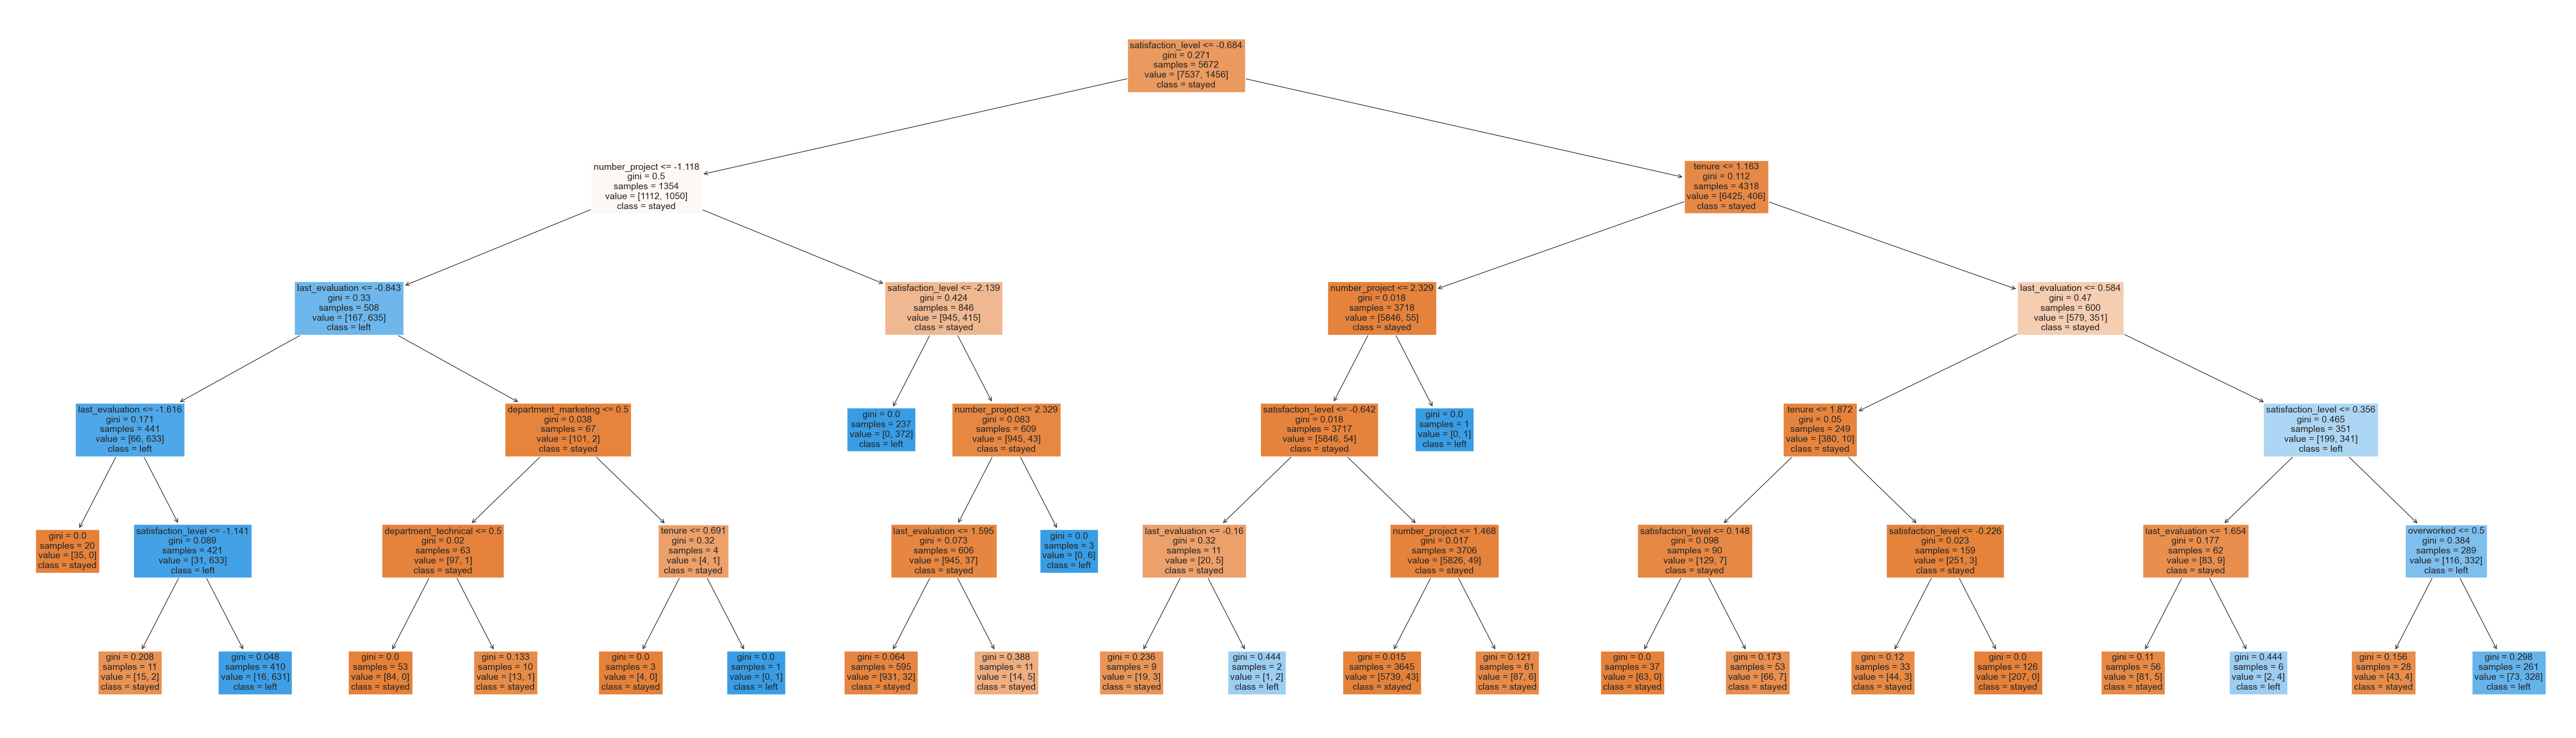

In [56]:
rf_plot=rf_cv.best_estimator_[0]
plt.figure(figsize=(70,20))
plot_tree(rf_plot, filled=True, fontsize=14, feature_names=X.columns, class_names={0:"stayed", 1:"left"})
plt.show()

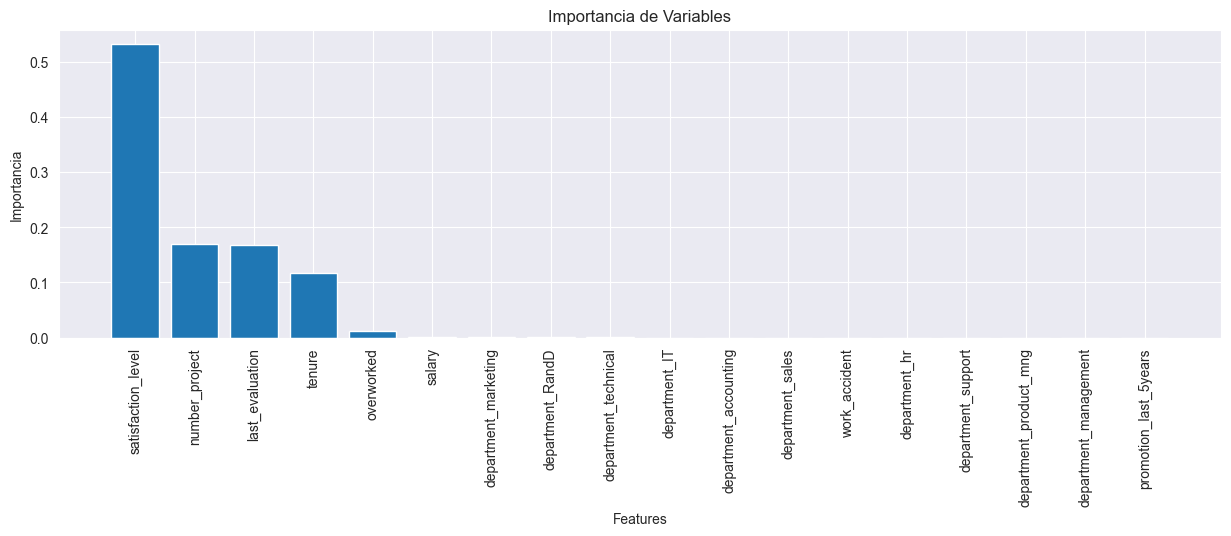

In [57]:
importances = rf_cv.best_estimator_.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]
plt.figure(figsize=(15,4))
plt.title("Importancia de Variables")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[x] for x in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importancia")
plt.show()

- El gráfico de barras nos muestra que para el modelo de Random Forest, `satisfaction_level`, `number_project`, `last_evaluation`, `tenure` y `overworked` son los features mas importantes.

- Estas variables son los que mas le ayudan al modelo a predecir la variable `left`. 

## 7. Conclusiones y Recomendaciones

- Los modelos y la importancia de las variables confirman que los empleados de la empresa están sobrecargados de trabajo.
- Se recomienda limitar el nro de proyectos en los que el empleado se podría involucrar.
- Considerar también la posibilidad de promoción de puesto laboral a los empleados que llevan en la empresa al menos ya 4 años.
- Considerar bonos o algún tipo de incentivo a los empleados por trabajar más horas que el promedio.
- Por otro lado si la empresa en su política no considera pago de horas extras, informar a los empleados y aclararlo.
- Las altas evaluaciones al personal no debería estar reservado para los empleados que trabajan largas jornadas laborales.


*Tomando en cuenta que las evaluaciones no se realizan mas que 1 o 2 veces al año, esta variable podría estar representando una fuga de datos y en consecuencia podría ser incongruente con el modelo. Sin embargo a modo de ejemplo se ha considerado y se ha incluido en el modelo*